### Questão 7
Execute o procedimento de clusterização hierárquica sobre o dataset make_swiss_roll. Apresente os resultados.

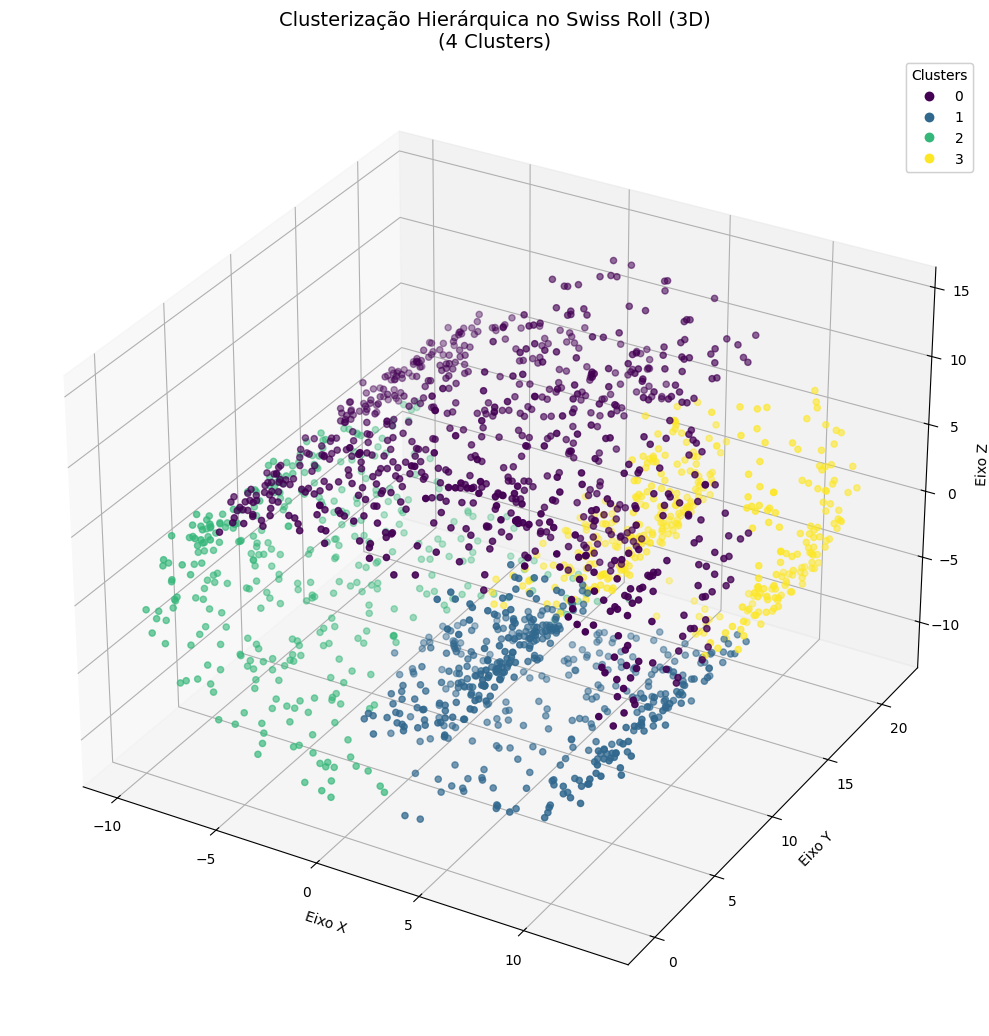

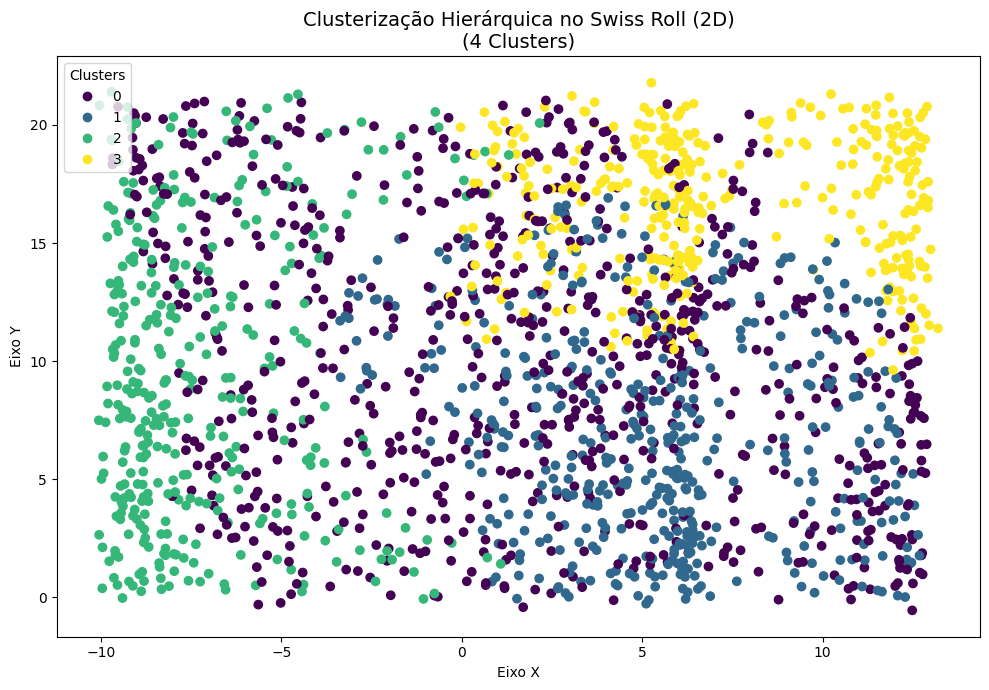

In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# Criar dados sintéticos
RANDOM_STATE = 11
features, target = make_swiss_roll(n_samples=2000, noise=0.3, random_state=RANDOM_STATE)

# Clusterização Hierárquica com os dados sintéticos
N_CLUSTERS = 4
ward_cluster = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage="ward")
ward_labels = ward_cluster.fit_predict(features)

# Gerar gráfico 3D
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=ward_labels, cmap='viridis')
ax.set_title(f'Clusterização Hierárquica no Swiss Roll (3D)\n({N_CLUSTERS} Clusters)', fontsize=14)
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.tight_layout()
plt.show()

# Gerar gráfico 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(features[:, 0], features[:, 1], c=ward_labels, cmap='viridis')
plt.title(f'Clusterização Hierárquica no Swiss Roll (2D)\n({N_CLUSTERS} Clusters)', fontsize=14)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()

### Questão 8
Construa um dendrograma para o modelo obtido na questão anterior. Apresente os resultados.

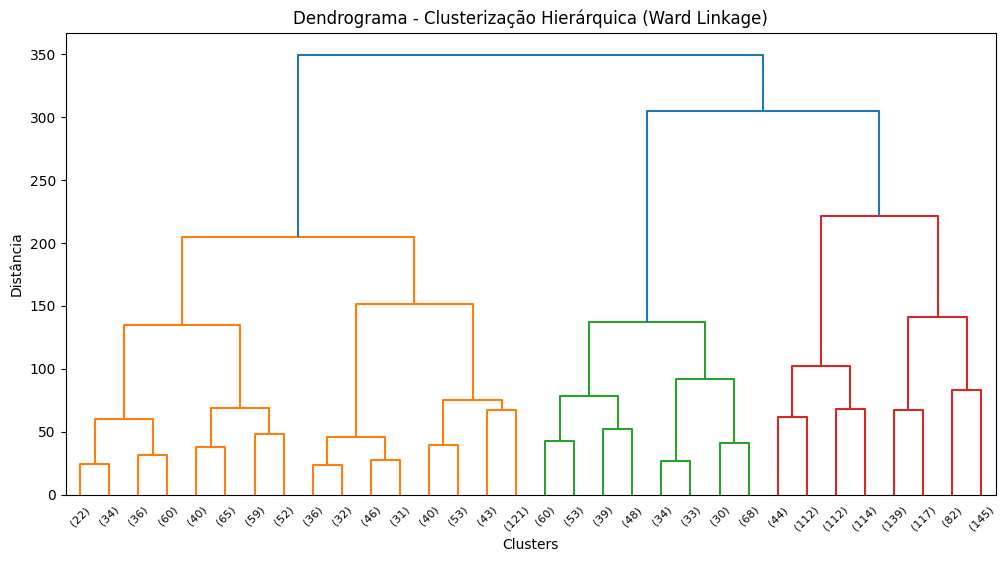

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Criar matriz de linkage
linkage_matrix = linkage(features, method='ward')

# Gerar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=N_CLUSTERS)
plt.title("Dendrograma - Clusterização Hierárquica (Ward Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Distância")
plt.show()

### Questão 9
Associe o dendrograma da questão anterior a um mapa de calor. Apresente os resultados. 

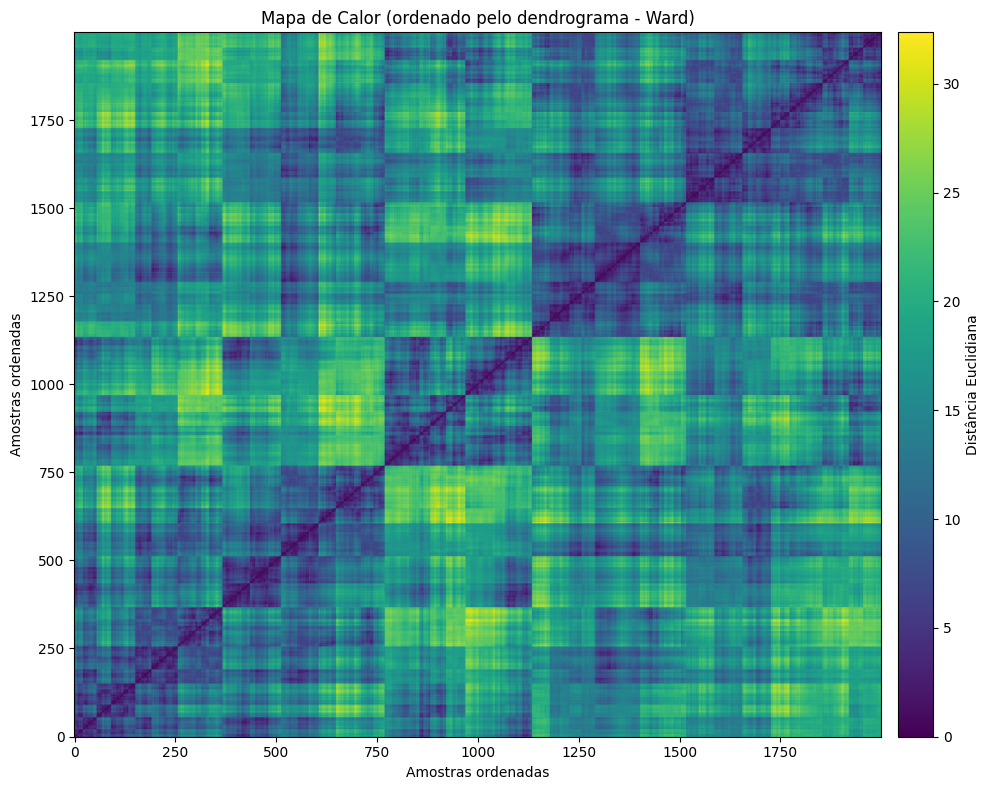

In [3]:
from scipy.spatial.distance import pdist, squareform

# Gerar dendrograma sem truncamento dos dados
ward_dendogram = dendrogram(linkage_matrix, no_plot=True)
leaf_order = ward_dendogram['leaves']

# Criar matriz de distância
distance_matrix = squareform(pdist(features, metric="euclidean"))
distance_matrix_ord = distance_matrix[np.ix_(leaf_order, leaf_order)]

# Criar mapa de calor
plt.figure(figsize=(10, 8))
im = plt.imshow(distance_matrix_ord, aspect="auto", cmap="viridis", origin="lower")
plt.title("Mapa de Calor (ordenado pelo dendrograma - Ward)")
plt.xlabel("Amostras ordenadas")
plt.ylabel("Amostras ordenadas")
cbar = plt.colorbar(im, fraction=0.046, pad=0.02)
cbar.set_label("Distância Euclidiana")
plt.tight_layout()
plt.show()

### Questão 11
Demonstre como determinar o número de clusters em um procedimento de clusterização hierárquica baseando-se na distância relativa entre os agrupamentos obtidos em cada etapa.